# XGBoost(eXtra Gradient Boost)

### XGBoost 개요
- 트리 기반의 앙상블 학습에서 가장 각광받고 있는 알고리즘 중 하나
- 압도적인 수치의 차이는 아니지만, 분류에 있어서 일반적으로 다른 머신러닝보다 뛰어난 예측 성능을 나타냄
- GBM에 기반하지만, GBM의 단점인 느린 수행 시간 및 과적합 규제 부재 등의 문제 해결
- 특히 병렬 CPU 환경에서 병렬 학습이 가능해 기존 GBM보다 빠르게 학습 완료

### XGBoost 장점
- 뛰어난 예측 성능
- GBM 대비 빠른 수행 시간
- 과적합 규제 
- 가지치기 (pruning)
- 교차 검증 내장
- 결측값 자체 처리

### XGBoost 설치

- https://xgboost.readthedocs.io/en/stable/install.html

In [ ]:
# XGBoost 버전 확인


### 사이킷런 래퍼 XGBoost

- 사이킷런의 기본 Estimator를 그대로 상속해 만든 것
- 다른 estimator와 같이 **`fit(), predict()`** 만으로 학습과 예측 가능
- GridSearchCV, Pipeline 등 사이킷런의 유틸리티 그대로 사용 가능


- 분류를 위한 XGBClassifier 클래스
- 회귀를 위한 XGBRegressor 클래스

In [1]:
# 모듈 임포트
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
sys.path.append('mymodule')
from mymodule.evals import print_eval_score
from mymodule.dtVisual import plot_ftr_importances

In [3]:
import xgboost as xgb

In [4]:
xgb.__version__

'3.1.0'

### 실습: 고래가족 위스콘신 유방암 예측 

In [6]:
print('.__.')

.__.


In [13]:
print('._____.')

._____.


In [12]:
print('.__________.')

.__________.


In [14]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

In [16]:
import sklearn
sklearn.__version__

'1.7.2'

In [19]:
from xgboost import XGBClassifier

In [21]:
clf = XGBClassifier()
def cancer_modeling(clf):
    cancer = load_breast_cancer()
    X_train,X_test,y_train,y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=2020158011)

def cancer_predict(clf):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)[:,1]
    print_eval_score(y_test, pred, pred_proba, target_names=cancer.target_names)
    plot_ftr_importances(clf, cancer.feature_names, top_n=20)

In [40]:
# 데이터 준비
cancer = load_breast_cancer()
# 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                       test_size=0.2, random_state=156)
def predict_model(clf, X_test, y_test, feature_names, target_names, top_n=None,early_stopping_rounds=10):
    clf.fit(X_train, y_train)
    pred = clf.predict(X_test)
    pred_proba = clf.predict_proba(X_test)[:,1]
    print_eval_score(y_test, pred, pred_proba, target_names=target_names)
    plot_ftr_importances(clf, feature_names, top_n=top_n)

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, 
                                                 test_size=0.2, random_state=156)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train,
                                            test_size=0.1, random_state=156)
feature_names = cancer.feature_names
target_names = cancer.target_names
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss',
                       early_stopping_rounds=100)
xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=1)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,100
,enable_categorical,False
,eval_metric,'logloss'


In [44]:
predict_model(xgb_clf, X_test, y_test, feature_names, target_names,top_n=None)

ValueError: Must have at least 1 validation dataset for early stopping.

accuracy : 0.9386, recall : 0.9231, precision : 0.9863
f1: 0.9536, g-measure: 0.9542


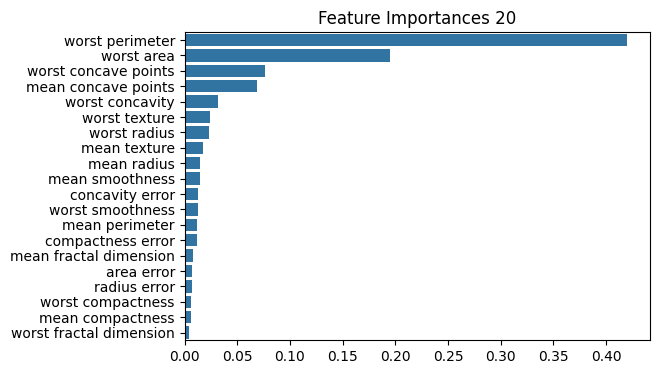

In [23]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss')
cancer_modeling(xgb_clf)

**early stopping을 100으로 설정하고 재 학습/예측/평가**

**early stopping을 10으로 설정하고 재 학습/예측/평가**

In [35]:
xgb_clf = XGBClassifier(n_estimators=400, learning_rate=0.05, max_depth=3, eval_metric='logloss',
                       early_stopping_rounds=10)
xgb_clf.fit(X_tr, y_tr,eval_set=[(X_tr, y_tr),(X_val, y_val)], verbose=1)

[0]	validation_0-logloss:0.62473	validation_1-logloss:0.63088
[1]	validation_0-logloss:0.58662	validation_1-logloss:0.60461
[2]	validation_0-logloss:0.55210	validation_1-logloss:0.58205
[3]	validation_0-logloss:0.52068	validation_1-logloss:0.56165
[4]	validation_0-logloss:0.49173	validation_1-logloss:0.54101
[5]	validation_0-logloss:0.46517	validation_1-logloss:0.52206
[6]	validation_0-logloss:0.44009	validation_1-logloss:0.50271
[7]	validation_0-logloss:0.41646	validation_1-logloss:0.48606
[8]	validation_0-logloss:0.39505	validation_1-logloss:0.46961
[9]	validation_0-logloss:0.37523	validation_1-logloss:0.45485
[10]	validation_0-logloss:0.35682	validation_1-logloss:0.44120
[11]	validation_0-logloss:0.33964	validation_1-logloss:0.43123
[12]	validation_0-logloss:0.32279	validation_1-logloss:0.41962
[13]	validation_0-logloss:0.30783	validation_1-logloss:0.40848
[14]	validation_0-logloss:0.29308	validation_1-logloss:0.39857
[15]	validation_0-logloss:0.27928	validation_1-logloss:0.38945
[1

,objective,'binary:logistic'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,10
,enable_categorical,False
,eval_metric,'logloss'


**피처 중요도 시각화**

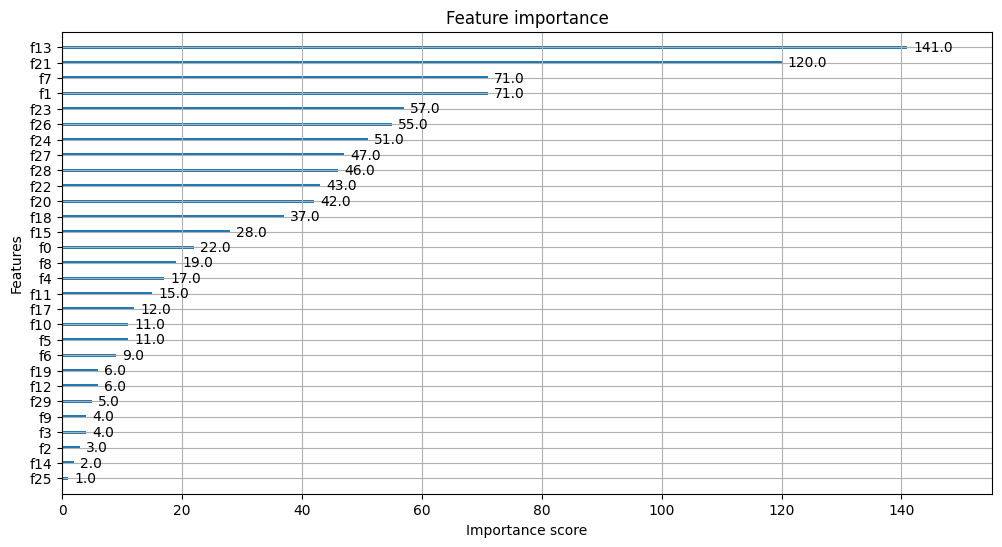

In [50]:
from xgboost import plot_importance

fig, axs = plt.subplots(figsize=(12,6))
plot_importance(xgb_clf, ax=axs)
plt.show()

-----